##                 MULTIVARIATE LINEAR REGRESSION

This notebook will show how employee salaries can be predicted from different employee characteristics (or features).

In [52]:
#import required packages

import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## **Table of Contents**

This assignment addresses the following:


[Exploratory Data Analysis -EDA](#EDA) 
<a href='EDA'> </a>

[Feature Engineering](#feng)
<a href='feng'> </a>

[Correlation and Statistical Significance Analysis](#corr)
<a href='corr'> </a>

[Feature Selection](#select)
<a href='select'> </a>

[Model Training](#train)
<a href='train'> </a>

[Predictions](#predict)
<a href='predict'> </a>

[Model Testing](#test)
<a href='test'> </a>

[Model Evaluation](#eval)
<a href='eval'> </a>


<a id='EDA'></a> <div class="alert alert-block alert-info">

#### Exploratory Data Analysis (EDA)
 </div>

In [2]:
#Load Data
sal = pd.read_csv('data/salary.csv')

In [3]:
#Examine for Missing Values
sal.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

* Our target variable (salary) has one missing value.

In [4]:
#Method to fix missing value
sal['salary'].fillna(sal['salary'].mean(),inplace = True)
#sal = sal.drop_duplicates()

* Fill missing value (w/ mean). Duplicates would be dropped if dataset had any 
* Filled w/ mean instead of dropping because salary is the target variable and don't want to miss out on any insights it might bring even when it's just one value.

In [5]:
sal.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


* The above table tells us the number of observations (514). We expect salary to have 514 because the missing value is now represented by the mean.
* The descriptive statistics table also tells us about the means, standard deviations, min and max values as well as the percentiles.


### Visualisations

In [6]:
# scatter_matrix(sal, alpha=0.2, figsize=(15, 30))
# plt.show()

__We use a pairplot to see the relationship between different values as well as to see which columns have continuous values.__

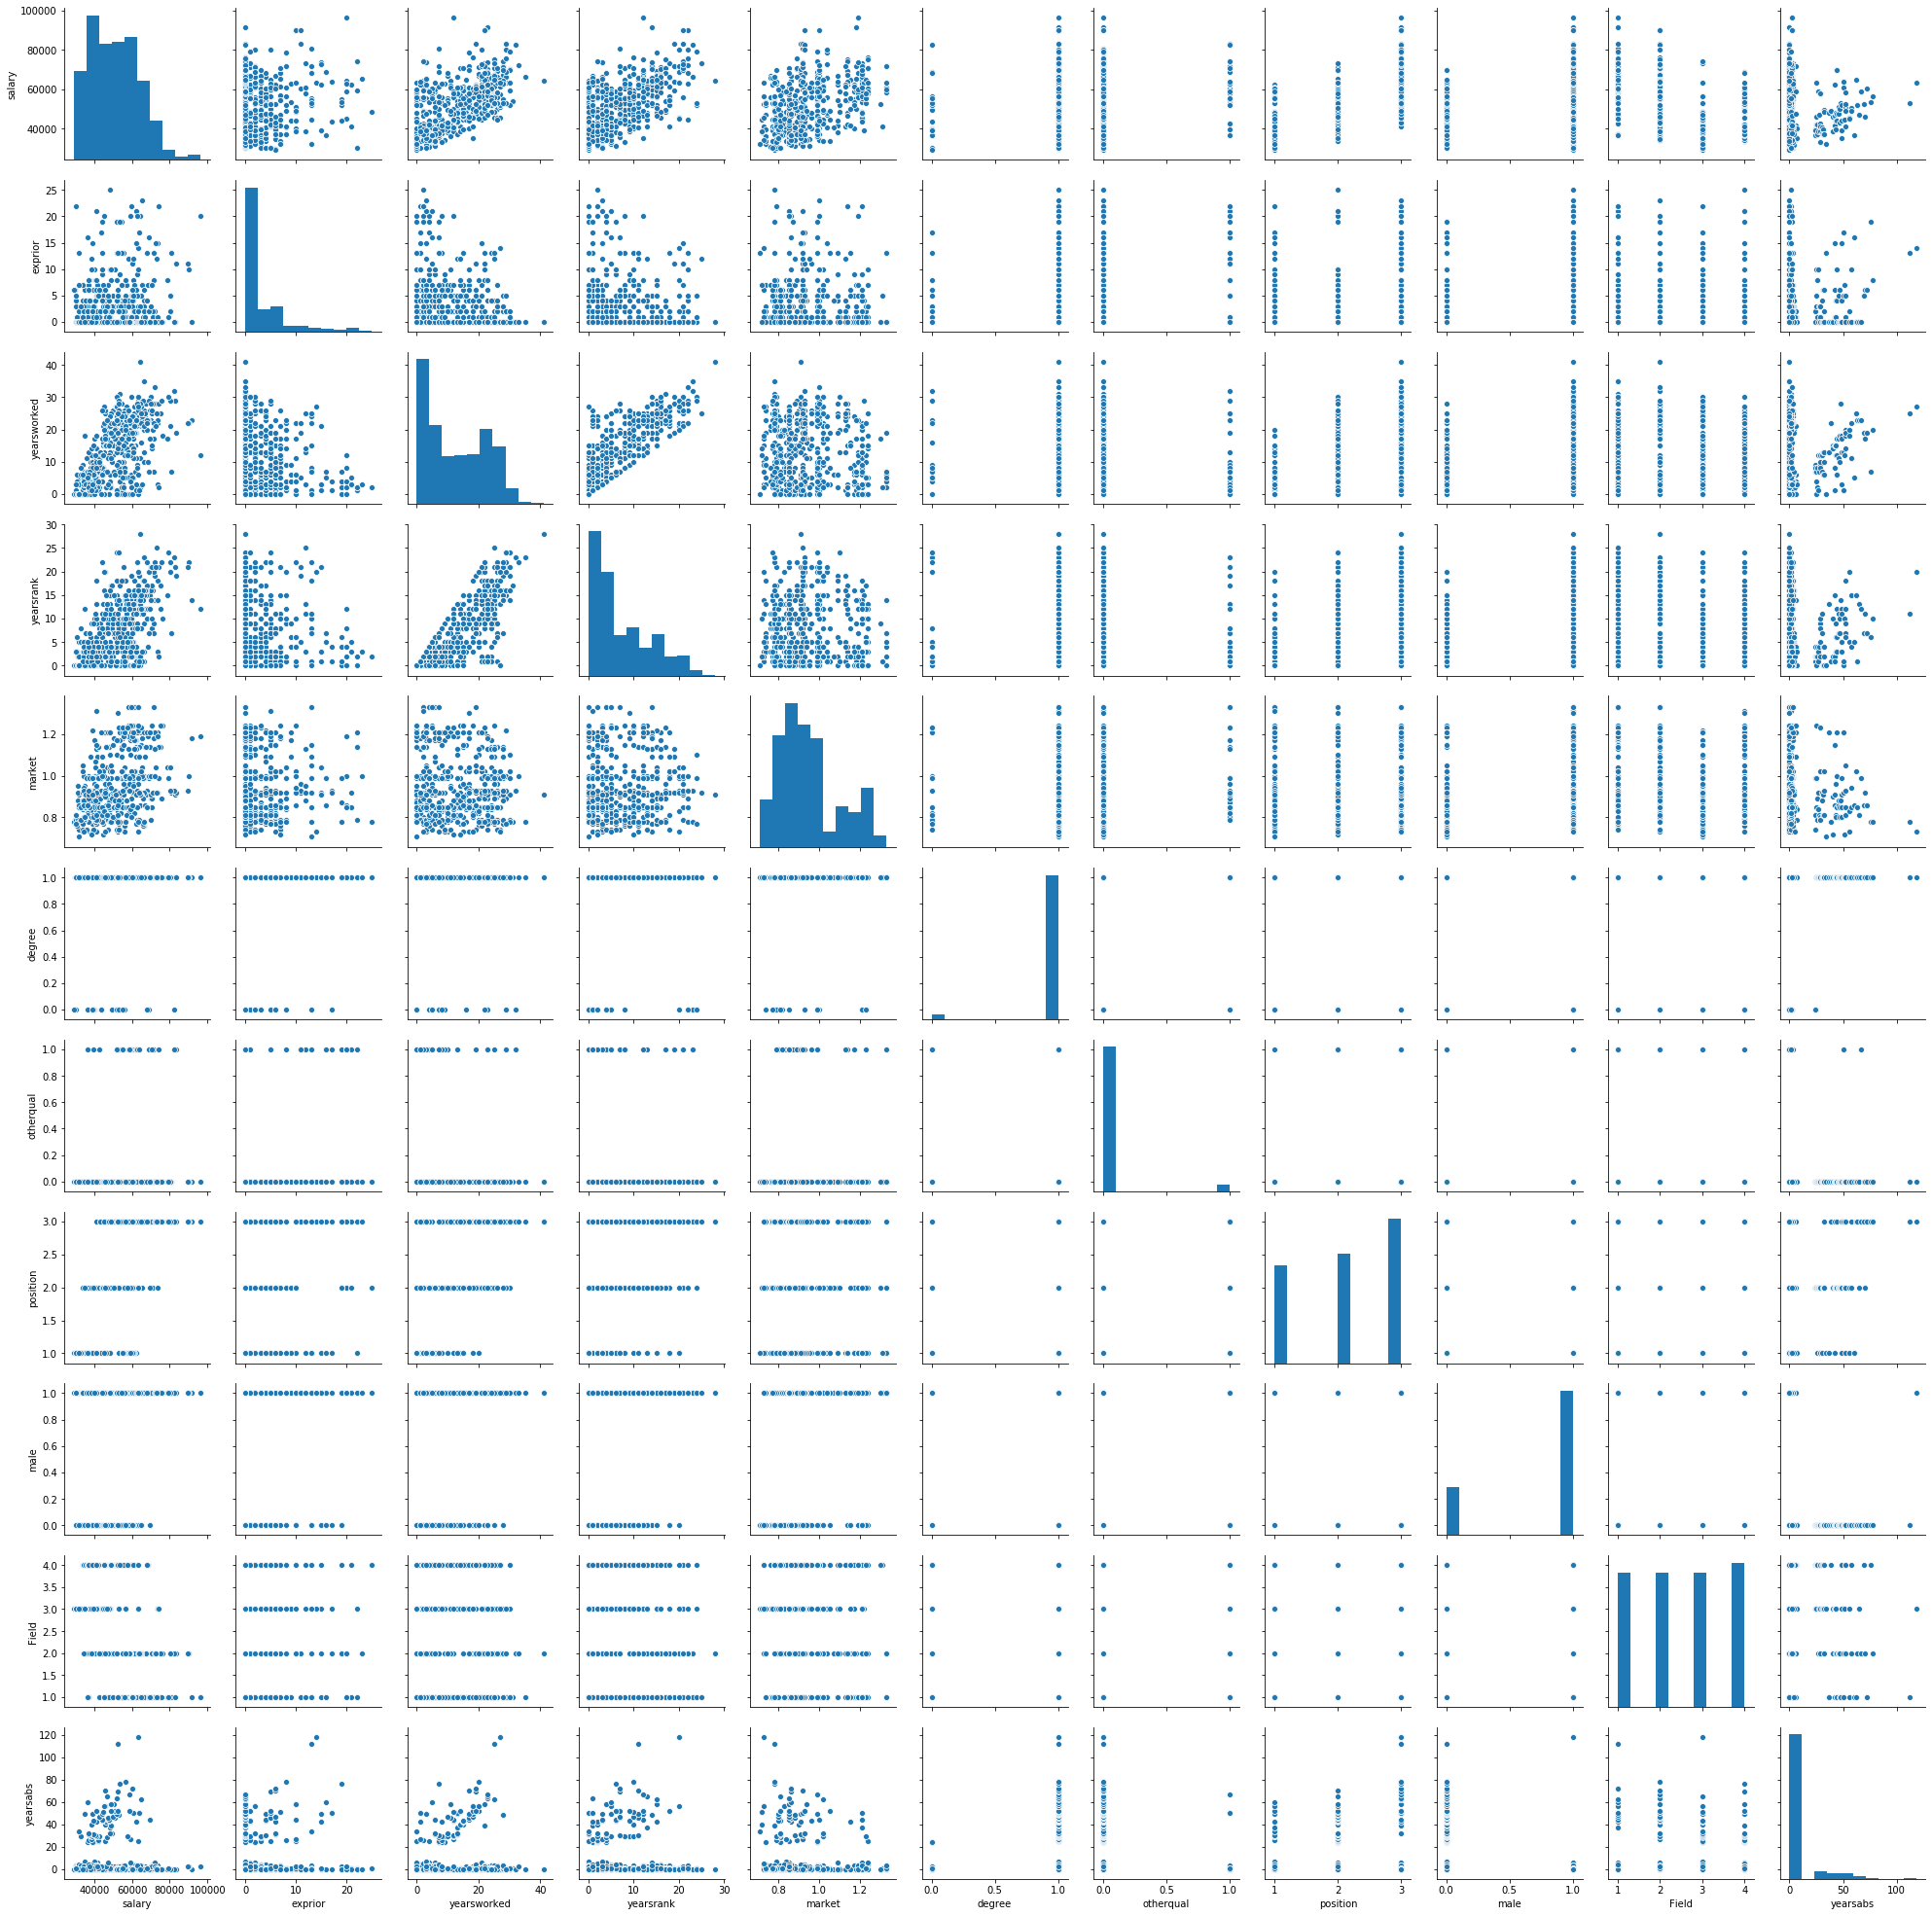

In [7]:
sns.pairplot(sal)
plt.show()

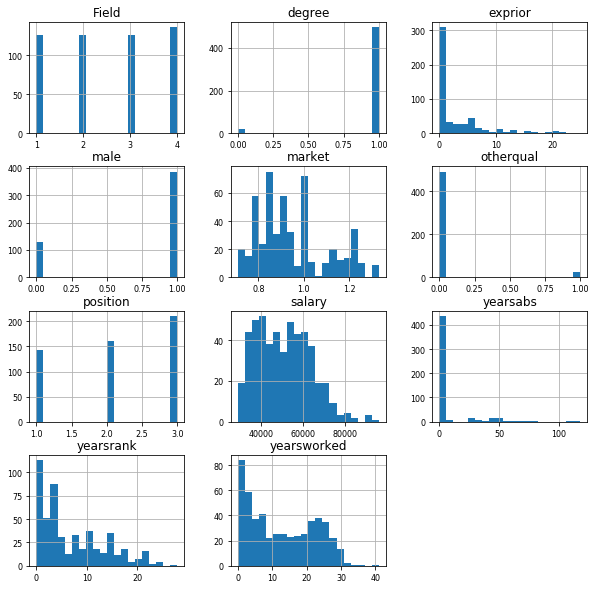

In [8]:
sal.hist(figsize=(10, 10),bins=20, xlabelsize=8, ylabelsize=8)
plt.show()

 <a id='feng'></a> <div class="alert alert-block alert-info">

#### Feature Engineering
 </div>

In [9]:
dummies = pd.get_dummies(sal['Field'])

dum = dummies.rename(columns={1:'engineering',2:'finance',3:'HR',4:'marketing'})

sal2 = pd.concat([sal, dum] ,axis=1, ignore_index=False)
sal2.drop("Field", inplace=True, axis=1)
#sal2.head(5)

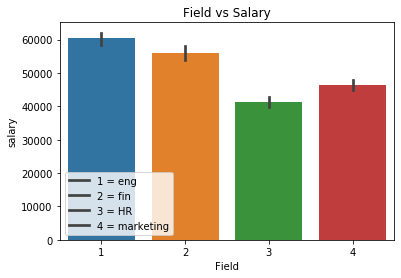

In [10]:
sns.barplot(sal['Field'],sal['salary'])
plt.title('Field vs Salary')
labels = ['1 = eng','2 = fin','3 = HR','4 = marketing']
plt.legend(labels)
plt.show()


 <a id='corr'></a> <div class="alert alert-block alert-info">

#### Correlation Analysis and Statistical Significance 
 </div>

### Calculate Pearson correlation coeffificent and plot the corresponding correlation matrix


In [11]:
sal_corr = sal.corr()
sal_corr.style.background_gradient(cmap = 'Greys')

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1,0.119946,0.623135,0.61058,0.407208,0.0445522,0.167129,0.701354,0.361447,-0.498485,-0.0696218
exprior,0.119946,1,-0.246549,-0.066403,-0.0350411,-0.0493727,0.264804,0.116596,0.0465577,-0.0483155,0.13238
yearsworked,0.623135,-0.246549,1,0.813471,-0.0708964,0.028421,-0.04049,0.746736,0.278963,-0.261379,0.0554682
yearsrank,0.61058,-0.066403,0.813471,1,-0.0269746,0.00651583,0.0070362,0.48521,0.237787,-0.263953,0.0356316
market,0.407208,-0.0350411,-0.0708964,-0.0269746,1,0.036408,0.0216917,-0.0133578,0.181201,-0.223827,-0.167068
degree,0.0445522,-0.0493727,0.028421,0.00651583,0.036408,1,-0.214717,0.0436796,0.061611,-0.0984242,0.0293106
otherqual,0.167129,0.264804,-0.04049,0.0070362,0.0216917,-0.214717,1,0.160311,0.0158332,-0.0766229,-0.0176389
position,0.701354,0.116596,0.746736,0.48521,-0.0133578,0.0436796,0.160311,1,0.318129,-0.288812,0.0297514
male,0.361447,0.0465577,0.278963,0.237787,0.181201,0.061611,0.0158332,0.318129,1,-0.128874,-0.622179
Field,-0.498485,-0.0483155,-0.261379,-0.263953,-0.223827,-0.0984242,-0.0766229,-0.288812,-0.128874,1,-0.000126793


__Everything has a correlation but it is the strength of the correlation that we are interested in.__
* Based on the above table these features are good predictors for salary; yearsworked, yearsrank, position and Field


In [12]:
print(f'p-value & correlation coef of yearsworked and salary: {stats.pearsonr(sal.yearsworked, sal.salary)}')
print(f'p-value & correlation coef of yearsrank and salary: {stats.pearsonr(sal.yearsrank, sal.salary)}')
print(f'p-value & correlation coef of postion and salary: {stats.pearsonr(sal.position, sal.salary)}')
print(f'p-value & correlation coef of Field and salary: {stats.pearsonr(sal.Field, sal.salary)}')

p-value & correlation coef of yearsworked and salary: (0.6231354820920553, 1.2747795189692683e-56)
p-value & correlation coef of yearsrank and salary: (0.610580392524893, 7.841461421302136e-54)
p-value & correlation coef of postion and salary: (0.7013536954022151, 2.6542174506471035e-77)
p-value & correlation coef of Field and salary: (-0.4984854745837175, 1.2205378378494786e-33)


<a id='select'></a> <div class="alert alert-block alert-info">

#### Feature Selection
 </div>

In [13]:
rank={1:'Junior', 2:'Manager', 3:'Executive'}
sal2['position']=sal2.position.map(rank)

In [14]:
sal2 = sal.drop(['exprior', 'market', 'degree', 'otherqual', 'male', 'yearsabs'], axis=1)

In [15]:
# rank={'Junior':'1', 'Manager':'2', 'Executive':'3'}
# sal2['position']=sal2.position.map(rank)

## How To Check for Multicollinearity

<blockquote> "Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation." - (Taken from the book 'Understanding Regression Analysis')
</blockquote>

- Step 1: Check correlation between selected features. (i.e identify variables affected by multicollinearity)
- Step 2: Calculate the VIF factors
(The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.)
- Step 3: Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.


#### [Read More Here](https://newprairiepress.org/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1034&context=agstatconference)

In [16]:
#Step1
m_coll = sal2[['yearsworked', 'yearsrank', 'position', 'Field']]

In [17]:
#Step2

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(m_coll.values, i) for i in range(m_coll.shape[1])]
vif["features"] = m_coll.columns

In [18]:
vif.round(1)

,VIF Factor,features
0,14.7,yearsworked
1,6.8,yearsrank
2,10.5,position
3,3.2,Field


In [19]:
#Step 3

###### Interpretaion

- VIF ranges from 1 upwards. 
- generally a VIF above 10 indicates high correlation 
- if you have high VIFs for dummy variables representing nominal variables with three or more categories, those are usually not a problem.

Judging by the correlation matrix below, yearsworked is highly correlated with position (0.75) & yearsrank (0.81). This is the variable that'll be removed before moving on to model building.

In [20]:
features_corr = sal2.corr()
features_corr.style.background_gradient(cmap = 'Oranges')

,salary,yearsworked,yearsrank,position,Field
salary,1,0.623135,0.61058,0.701354,-0.498485
yearsworked,0.623135,1,0.813471,0.746736,-0.261379
yearsrank,0.61058,0.813471,1,0.48521,-0.263953
position,0.701354,0.746736,0.48521,1,-0.288812
Field,-0.498485,-0.261379,-0.263953,-0.288812,1


In [21]:
sal2 = sal2.drop(['yearsworked'], axis=1)

 <a id='train'></a> <div class="alert alert-block alert-info">

#### Model Training
 </div>

__Dataset is split into a train & test set. 
70% of the data will go into the training set and the remaining 30% will be used for testing.__

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
#split data
x = sal2.drop('salary', axis=1)
y = sal2["salary"]

x = sm.add_constant(x)

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

In [24]:
model = ols('salary ~ yearsrank + position + Field', sal2).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     327.6
Date:                Sat, 11 Apr 2020   Prob (F-statistic):          1.68e-118
Time:                        21:28:49   Log-Likelihood:                -5308.7
No. Observations:                 514   AIC:                         1.063e+04
Df Residuals:                     510   BIC:                         1.064e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.906e+04   1376.762     28.370      0.000    3.64e+04    4.18e+04
yearsrank    608.3791     59.127     10.289      0.000     492.217     724.541
position    7273.8416    465.953     15.611      0.000    6358.418    8189.266
Field      -3161.4608    307.256    -10.289      0.000   -3765.104   -2557.817
==============================================================================
Omnibus:                       67.223   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.761
Skew:                           0.903   Prob(JB):                     1.61e-21
Kurtosis:                       4.099   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value reveals the quality of the regression model. It describes the relationships between dependent and independent variables in a model. The R-squared value for this model is 0.66. This means the accuracy of the model is approx 66%.

<a id='predict'></a> <div class="alert alert-block alert-info">

#### Predictions

Predicting salary using the train set.
 </div>

In [26]:
predict_salary = model.predict(X_train)

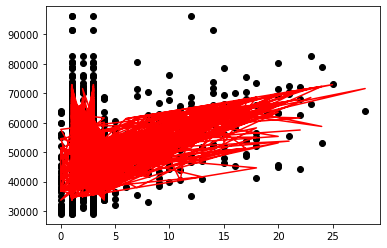

In [24]:
# model_salary = model(X_train, Y_train)
# Use plt.subplots() to create figure and axis objects.
# fig, axis = plt.subplots()
# axis.plot(X_train, Y_train, linestyle=" ", marker="o", color="black", label="Measured", )
# axis.plot(X_train, predict_salary, linestyle="-", marker=None, color="red", label="Modeled")
# plt.show()

In [27]:
#create dataframe for predicted values
df = pd.DataFrame(predict_salary)
df.rename(columns={0:'predicted_salary'},inplace=True)
df.head(2)

,predicted_salary
138,44002.275434
274,66235.911385


In [28]:
df_combo = pd.concat([Y_train,X_train,df],axis=1)

In [31]:
df_compare = df_combo[['salary', 'predicted_salary']]
df_compare.head(3)


,salary,predicted_salary
138,55847.0,44002.275434
274,71812.0,66235.911385
124,33787.0,41568.759063


- The model has made reasonable predictions. Lets look at the figures in index 421. Salary had a value of 40 356 and the model predicted 39 282.
- The model has an accuracy rate of 66% and it means some estimations may be off. The values in index 398 are one such example.
- A conclusion we can make from this is that although the model needs some fine-tuning, the chosen predictors can help in predicting a person's salary.
- Can be generalized

<a id='test'></a> <div class="alert alert-block alert-info">

#### Model Testing

Predicting salary using the test set.
 </div>

In [32]:
#predict salary using the test set
test = model.predict(X_test)

In [33]:
#create dataframe of predicted salaries from the test set
df_test = pd.DataFrame(test)
df_test.rename(columns={0:'test_prediction'},inplace=True)

df_test

,test_prediction
369,70494.565033
486,58962.069738
162,49597.252628
17,36847.999148
229,57599.038727
...,...
133,47891.680710
481,57745.311553
268,52030.768999
393,34294.917417


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
test_reg = LinearRegression()
test_reg.fit(X_train, Y_train)

y_predict = test_reg.predict(X_test)

In [32]:
# print(f'“Score:”, model.score(X_test, Y_test)')

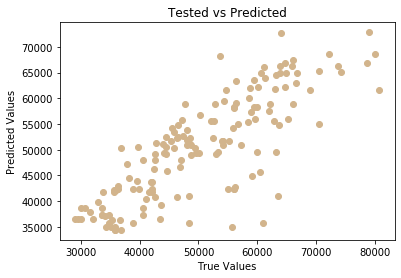

In [34]:
# plt.scatter(Y_test, y_predict, c='tan')
# plt.title('Tested vs Predicted')
# plt.xlabel('True Values')
# plt.ylabel('Predicted Values')# plt.show()

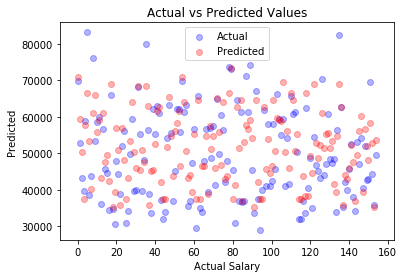

In [40]:
_, ax = plt.subplots()

ax.scatter(x = range(0, Y_test.size), y=Y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_predict.size), y=y_predict, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted')
plt.legend()
plt.show()

This scatterplot shows that the actual and predicted values follow the same trend except for the outliers.

<a id='eval'></a> <div class="alert alert-block alert-info">

#### Model Evaluations

 </div>

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
model_mse = np.sqrt(mean_squared_error(Y_test, y_predict))
model_mse

6946.887848248358

6947 is an error rate. Meaning that 6947 is the approximate variation when using predictions from this model.

In [44]:
from sklearn import metrics

In [175]:
trainRMSE = np.sqrt(metrics.mean_squared_error(Y_train, model.predict(X_train)))
trainRMSE

7490.5826743410535

In [176]:
testRMSE = np.sqrt(metrics.mean_squared_error(Y_test, model.predict(X_test)))
testRMSE

7261.3393983437145

- RMSE indicates the absolute fit of the model to the data (how close the actual data points are to the model's predicted ones.)
- Trainset RMSE is bigger than the Test RMSE
- RMSE is a good measure of how accurately the model predicts the target variable. It is the most important criteria for fit if the main purpose of the model is prediction.

#### Mean Absolute Error(MAE) is one of the many metrics for summarizing and assessing the quality of a machine learning model.


In [46]:
from sklearn.metrics import mean_absolute_error
y_true = df_compare.salary
y_pred = df_compare.predicted_salary
mean_absolute_error(y_true, y_pred)

5721.726499546644

In [166]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [167]:
mean_absolute_percentage_error(df_compare.salary, df_compare.predicted_salary)

11.581340625571935

- The mean absolute percentage error (MAPE) is a statistical measure of how accurate a forecast system is. It measures this accuracy as a percentage.
- (MAPE) works best if there are no extremes to the data
- Since MAPE is a measure of error, high numbers are bad and low numbers are good (meaning that our 11.6% is something to be happy about)


In [47]:
metrics.r2_score(y_true, y_pred)

0.6403540684472385

### Prediction Error Plot

In [54]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

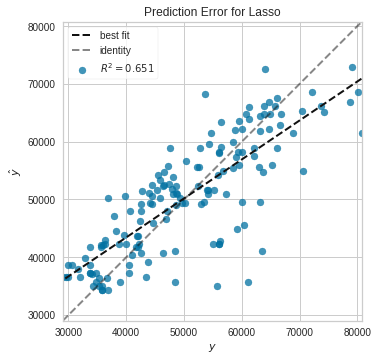

In [38]:
model = Lasso()
visualizer = PredictionError(model)

#Fit training data to visualizer
visualizer.fit(X_train, Y_train)

#Evaluate model on the test data
visualizer.score(X_test, Y_test)

visualizer.show()                 

- A __Prediction Error Plot__ shows the actual vales from the dataset against the predicted values generated by the model.
- This allows us to see how much variance is in the model.


In [55]:
from matplotlib import rcParams
from statsmodels.nonparametric.smoothers_lowess import lowess

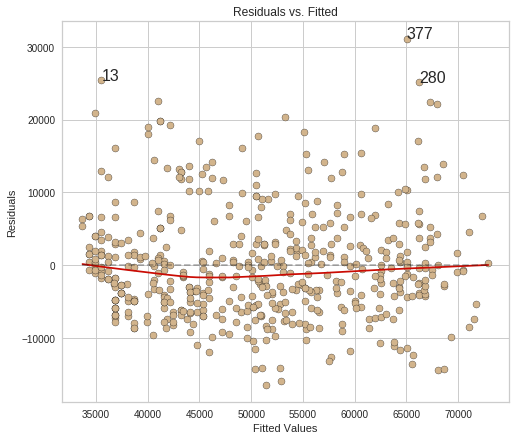

In [56]:
residuals = model.resid
fitted = model.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'tan')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = '--', alpha = 0.3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

- The 13, 280 & 377 we see on the plot represent the top 3 outliers
- Purpose of this plot is to see if there is structure in the residuals & fitted values. 

In [204]:
sal2.iloc[13]

salary         61008.0
yearsworked        3.0
yearsrank          3.0
position           1.0
Field              4.0
Name: 13, dtype: float64

It makes sense why this would be considered an outlier.
person occupies a junior position, has 3 years of work yet earns 61 008.

In [58]:
#Plotting the Residuals

# sns.residplot(fitted_values,prediction,lowess=True)
# plt.xlabel('Salaries')
# plt.title('Residual Plot of Actual Salary vs Predicted Salary')
# plt.show()

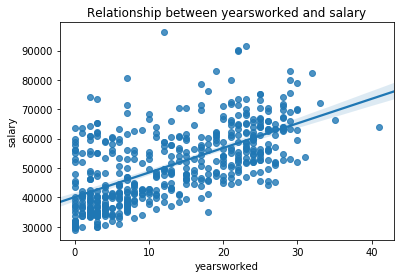

In [155]:
# sns.regplot( x="yearsworked", y= "salary", data=sal2, fit_reg=True)
# plt.title("Relationship between yearsworked and salary")
# plt.show()

* AS EXPECTED The assumption is that as the no. of years you work increase so will your salary. Positive slope backs up this assumption hence the positive upward correlation.